# Chapter 7 Ensemble Learning and Random Forests

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

np.random.seed(42)

## Voting Classifiers

In [56]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(
    1, 10001).reshape(-1, 1)


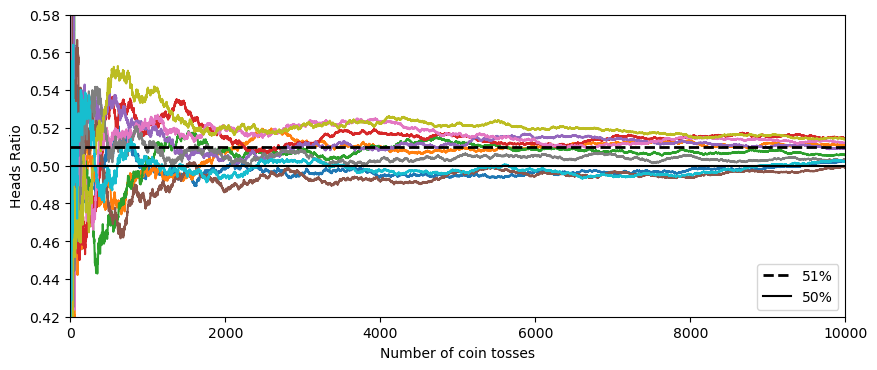

In [63]:
_, ax = plt.subplots(figsize=(10, 4), dpi=100)

ax.plot(cumulative_heads_ratio)
ax.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
ax.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
ax.set(xlabel="Number of coin tosses",
       ylabel="Heads Ratio",
       xlim=[0, 10000],
       ylim=[0.42, 0.58])
ax.legend(loc="lower right")

plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [61]:
X, y = make_moons(n_samples=500,noise=0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y)# test_size??

In [67]:
log_clf = LogisticRegression(solver="lbfgs")
rnd_clf = RandomForestClassifier()  # defalult n_estimators=100
svm_clf = SVC(gamma='scale')

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', log_clf),
                                          ('svc', svm_clf)],
                              voting='hard') 


In [68]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', LogisticRegression()), ('svc', SVC())])